In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sym


# Refresh
Matplotlib and lambda
https://www.geeksforgeeks.org/how-to-do-calculus-with-python/

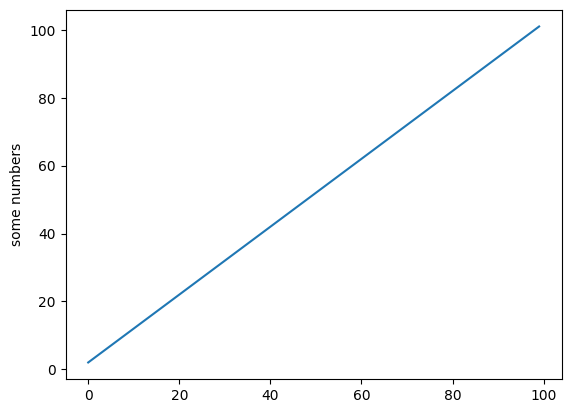

In [3]:
# start as a refresh of python and matplotlib

#create a list of input x
input_list = list(range(0, 100))
# print(input_list)

#create an empty list of output
output_list = list()
# print(output_list)

#A simple function
y = lambda x : 2 + x
# print(y(2))

#calculate the output y for each time point t
for i in input_list:
    output = y(i)
    output_list.append(output)
    # print(output_list)
    pass

#plot the graph
plt.plot(output_list)
plt.ylabel('some numbers')
plt.show()

# Differentiation
We can differentiate any sympy expression by using diff(func, var) method. The parameter func denotes the sympy expression to be differentiated and var denotes the variable with respect to which we have to differentiate.

In [4]:
# Declaring variables
x, y, z = sym.symbols('x y z')
 
# expression of which we have to find derivative
exp = x**3 * y + y**3 + z
 
# Differentiating exp with respect to x
derivative1_x = sym.diff(exp, x)
print('derivative w.r.t x: ',
      derivative1_x)
 
# Differentiating exp with respect to y
derivative1_y = sym.diff(exp, y)
print('derivative w.r.t y: ',
      derivative1_y)

derivative w.r.t x:  3*x**2*y
derivative w.r.t y:  x**3 + 3*y**2


Finding second derivative using the diff(func, var, n) method

In [5]:
# Finding second derivative
# of exp with respect to x
derivative2_x = sym.diff(exp, x, 2)
print('second derivative w.r.t. x: ',
      derivative2_x)
 
# Finding second derivative
# of exp with respect to y
derivative2_y = sym.diff(exp, y, 2)
print('second derivative w.r.t. y: ',
      derivative2_y)

second derivative w.r.t. x:  6*x*y
second derivative w.r.t. y:  6*y


# Integration

Syntax for indefinite integration: sympy.integrate(func, var)
Syntax for definite integration: sympy.integrate(func, (var,  lower_limit, upper_limit))

The parameter func denotes the sympy expression to be differentiated, var denotes the variable with respect to which we have to differentiate, lower_limit denotes to the lower limit of the definite integration and upper_limit denotes the upper limit of the definite integration.

Indefinite Integral :
    ∫f(x) dx = F (x) + c where
    F (x) is an anti-derivative of f(x)

Anti-Derivative : An anti-derivative of f(x) is a function, F (x), such that F ′(x) = f(x).

In [6]:
# Indefinite integration of cos(x) with respect to(w.r.t) dx
integral1 = sym.integrate(sym.cos(x), x)
print('indefinite integral of cos(x): ', integral1)

# definite integration of cos(x) w.r.t dx between -1 and 1
integral2 = sym.integrate(sym.cos(x), (x, -1, 1))
print('definite integral of cos(x) between -1 to 1: ', integral2)

# definite integration of exp(-x) w.r.t dx between 0 and infinite
integral3 = sym.integrate(sym.exp(-x), (x, 0, sym.oo))
print('definite integral of exp(-x) between 0 to ∞: ', integral3)



indefinite integral of cos(x):  sin(x)
definite integral of cos(x) between -1 to 1:  2*sin(1)
definite integral of exp(-x) between 0 to ∞:  1


# Limits
Calculate limit of a function by using limit(function, variable, point). So, if you want to compute the limit of f(x) as  x->0, you would issue limit(f, x, 0).


In [7]:
# Calculating limit of f(x) = x as x->∞
limit1 = sym.limit(x, x, sym.oo)
print(limit1)
 
# Calculating limit of f(x) = 1/x as x->∞
limit2 = sym.limit(1/x, x, sym.oo)
print(limit2)
 
# Calculating limit of f(x) = sin(x)/x as x->0
limit3 = sym.limit(sym.sin(x)/x, x, 0)
print(limit3)

oo
0
1


# Series Expansion

Compute Taylor series expansions of functions around a point. We can also compute Taylor series expansions of functions around a point. To compute the expansion of f(x) around the point x=x0 terms of order xn, use sympy.series(f, x, x0, n). x0 and n can be omitted, in which case the defaults x0=0 and n=6 will be used.

In [8]:
# assign series
series1 = sym.series(sym.cos(x), x)
print(series1)
 
# assign series
series2 = sym.series(1/sym.cos(x), x, 0, 4)
print(series2)

1 - x**2/2 + x**4/24 + O(x**6)
1 + x**2/2 + O(x**4)


# Euler's method
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html

In [105]:
# initial condition
t0 = 0.0
tn = 10.0  

# define the function and the initial guess
f = lambda t, s: np.exp(-t) # ODE
f0 = -1
diff_f = lambda t: -np.exp(-t)

def euler(f, h, t0, tn, f0, s):
    # approximiate the result using euler method
    s.append(f0)
    i = t0
    while i < tn:
        last_element = len(s) - 1
        s.append(s[last_element] + h * f(i, s[last_element]))
        i += h
        pass
    return s

def exact(func, h, t0, tn, s):
    s.append(f0)
    # calculte the target result
    i = t0
    while i < tn:
        s.append(func(i))
        i += h
        pass
    return s

def mse(list1, list2):
    # calculate the root mean square error between two lists
    return np.sqrt((np.subtract(list1, list2) ** 2).mean())


In [107]:
# the collection of errors w.r.t the number of test elements
error_list = []
nofelements = []

for n in range(1, 100, 1):
    h = (tn - t0) / n
    # print(h)
    
    # list of results by euler method and true function
    tmp = []
    approximations = euler(f, h, t0, tn, f0, tmp)
    tmp = []
    targets = exact(diff_f, h, t0, tn, tmp)
    # print(targets)
    
    # save all results with increased number of elements
    error_list.append(mse(approximations, targets))
    nofelements.append(n)
    
    # clean the collected results
    approximations = []
    targets = []
    pass

print(error_list)

[7.0710678118654755, 3.7114712201240607, 2.4156495641028806, 1.7552958712032967, 1.3654863193077824, 1.111931220794012, 0.9352703078473884, 0.8057633676958808, 0.7026019758655434, 0.6294841938323938, 0.563702496491789, 0.5156423267102968, 0.47271020978879, 0.4340867098955931, 0.40308658256417707, 0.3779515695137683, 0.352635325665058, 0.33184102172982194, 0.31464887632754057, 0.29798590134462344, 0.28299030671747494, 0.2684302378500464, 0.25709492513572113, 0.24583981491891835, 0.23552528763070213, 0.22603853687712597, 0.2166036354083891, 0.20854483161373644, 0.20165788329885187, 0.19465622086494022, 0.1875985432297902, 0.18201361148996478, 0.17582131971735426, 0.17090988401419444, 0.16585004966099612, 0.16108065362516488, 0.15620252780245786, 0.15231873028649728, 0.14794620966076388, 0.14445946556217273, 0.14082589360261943, 0.13707631717162758, 0.1340801651344732, 0.13067479152636502, 0.12769291370890284, 0.125090771127437, 0.12235602407631672, 0.11973816868613196, 0.1170114212066987

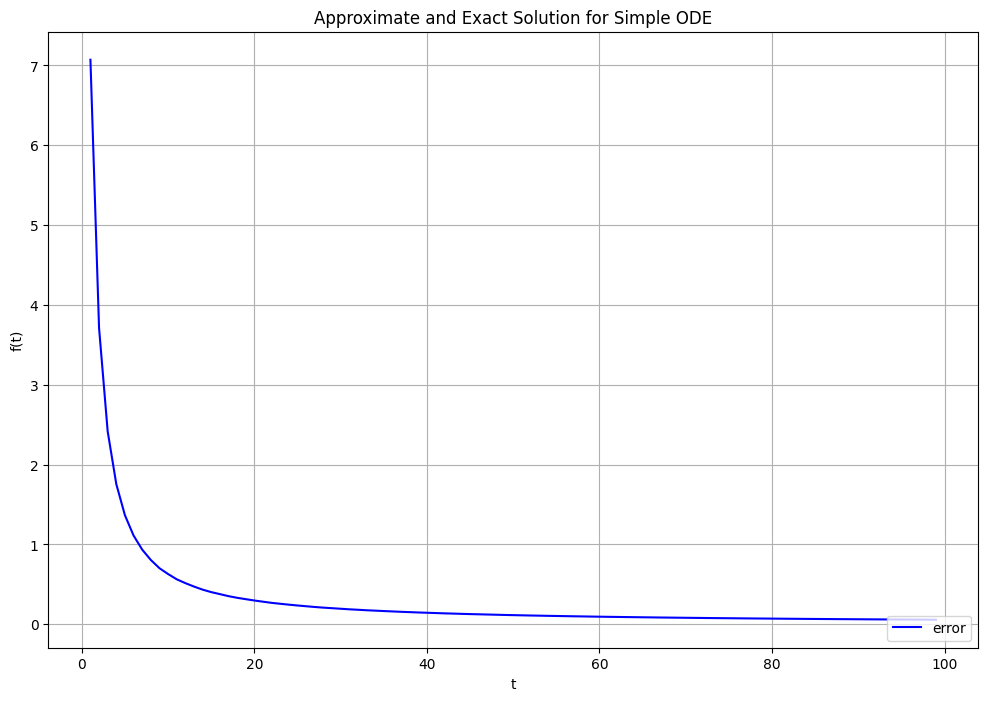

In [108]:
plt.figure(figsize = (12, 8))
plt.plot(nofelements, error_list, 'b', label='error')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

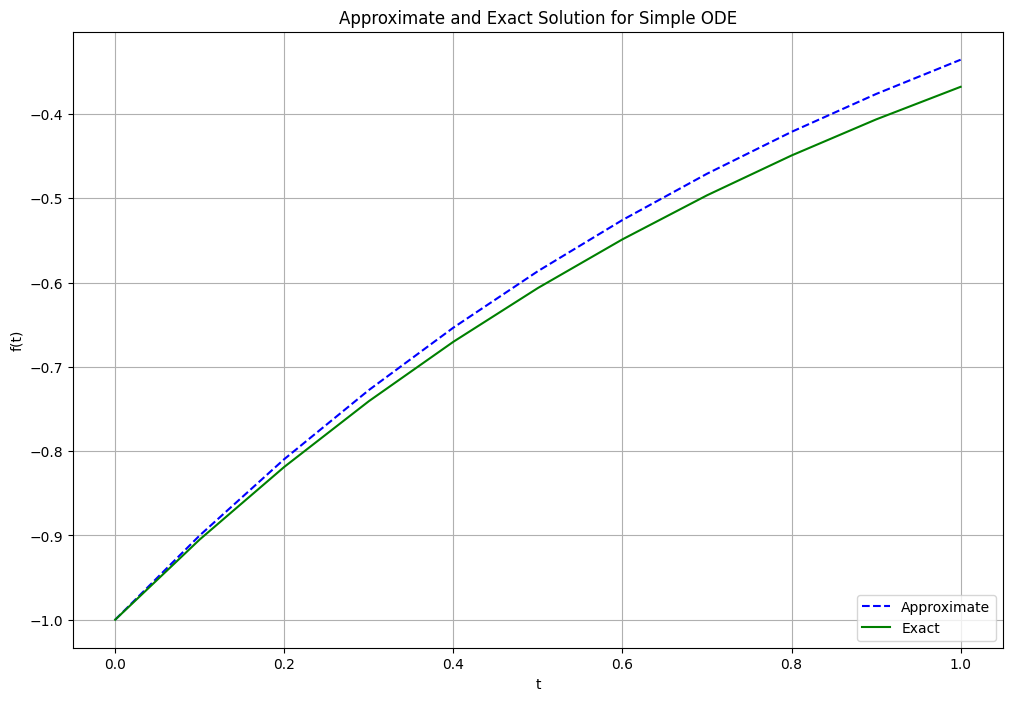

In [96]:
# plt.style.use('seaborn-poster')
# %matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition


# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

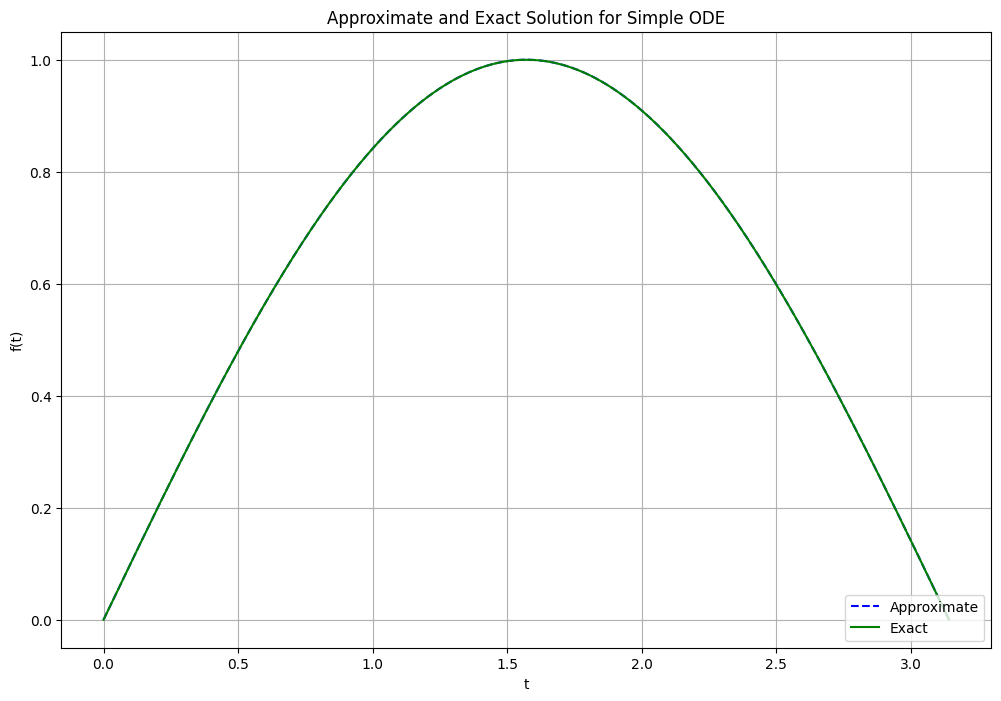

In [11]:
# plt.style.use('seaborn-poster')
# %matplotlib inline

# Define parameters
f = lambda t, s: np.cos(t) # ODE
h = 0.0001 # Step size
t = np.arange(0, np.pi + h, h) # Numerical grid
s0 = 0 # Initial Condition


# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, np.sin(t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# print(np.cos(1))

In [12]:
# plt.style.use('seaborn-poster')
# %matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t * f**2) # ODE
h = 0.0001 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 0 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, np.sin(t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# print(np.cos(1))

TypeError: unsupported operand type(s) for ** or pow(): 'function' and 'int'

# Newton's method
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html

-2.9999999999999996 0.0
-6.999999999999999 0.0


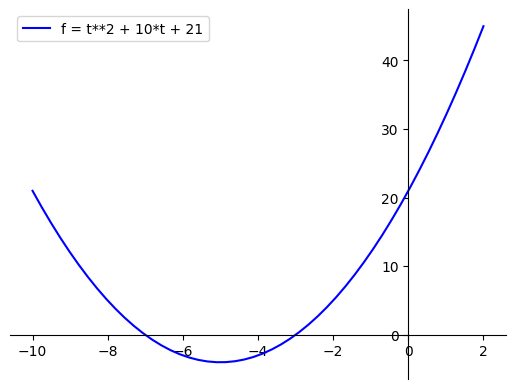

In [ ]:
# Declare variables
x = sym.Symbol('x')

# Delcare the function
f = x**2 + 10*x + 21

# Differenciate the function with respect to x
diff_f = sym.diff(f,x)
# print(diff_f)

# 
f_func = sym.lambdify(x, f, 'numpy')
diff_f_func = sym.lambdify(x, diff_f, 'numpy')
 
def newtonMethod(x0, iterationNumber, f, df):
    x = x0
    for i in range(iterationNumber):
        x = x - f(x) / df(x)
        pass
    residual = np.abs(f(x))
    return x, residual


solution, residual = newtonMethod(-2, 200, f_func, diff_f_func)
print(solution, residual)
solution, residual = newtonMethod(-10, 200, f_func, diff_f_func)
print(solution, residual)


t = np.linspace(-10, 2, 50)
y = t**2 + 10*t + 21
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the functions
plt.plot(t, y, 'b', label='f = t**2 + 10*t + 21')

plt.legend(loc='upper left')

# show the plot
plt.show()


You can use the built-in Python eval() to dynamically evaluate expressions from a string-based or compiled-code-based input. 

If you pass in a string to eval(), then the function parses it, compiles it to bytecode, and evaluates it as a Python expression. 

But if you call eval() with a compiled code object, then the function performs just the evaluation step, which is quite convenient if you call eval() several times with the same input.

e.g., 
eval("2 ** 8") will print 256

In [ ]:
def newtonsMethod(func, funcderiy, x, n):
    """_summary_

    Args:
        func (_type_): the user's function / the function to be solved
        funcderiy (_type_): the derivation of the user's function
        x (_type_): the initial guess 
        n (_type_): the number of iterations, more iteration, more accurate
    """
    
    def f(x):
        f = eval(func)
        return f
    
    def df(x):
        df = eval(funcderiy)
        return df
    
    for iteration_intercept in range(1, n):
        x0 = x - (f(x)/df(x))
        x = x0
        pass
    
    print(f"the root was found to be at {x} after {n} iterations")
    pass

newtonsMethod("x**2 - 2", "2*x", 2, 10)
newtonsMethod("x**2 - 2", "2*x", -10, 10)

the root was found to be at 1.4142135623730951 after 10 iterations
the root was found to be at -1.414213562373095 after 10 iterations
